In [139]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy 
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
import matplotlib.pyplot as plt

In [123]:
data=pd.read_csv('diabetes.csv')
data.head(20)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [112]:
X=data[['Pregnancies','Glucose','BloodPressure','Insulin','BMI', 'Age']]
Y=data['outcome']

In [113]:
logr=linear_model.LogisticRegression()

In [114]:
x_train, x_test, y_train, y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

In [115]:
logr=SVC(random_state=0)

In [116]:
logr.fit(x_train, y_train)


SVC(random_state=0)

In [117]:
y_predict=logr.predict(x_test)


In [118]:
cm=confusion_matrix(y_test,y_predict, labels=logr.classes_)

In [119]:
disp=ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logr.classes_)

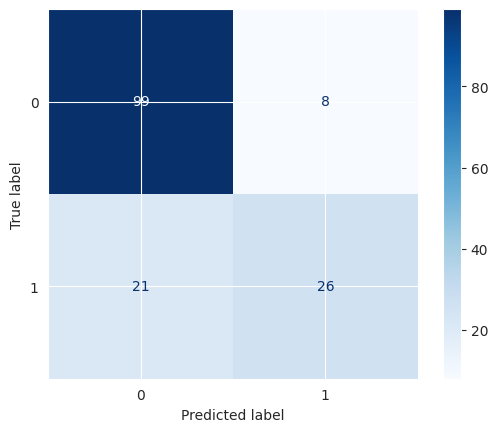

In [120]:
disp.plot(cmap="Blues")
plt.show()

In [121]:
print('El accuracy del modelo de regresion logistica es: ', accuracy_score(y_predict,y_test))

El accuracy del modelo de regresion logistica es:  0.8116883116883117


In [131]:
ran=RandomUnderSampler(sampling_strategy=1)

x_ran,y_ran=ran.fit_resample(x_train,y_train)

In [132]:
y_ran.value_counts()*100/len(y_ran)

outcome
0    50.0
1    50.0
Name: count, dtype: float64

In [135]:
mdbalg=LogisticRegression(max_iter=150)

In [136]:
mdbalg.fit(x_ran,y_ran)

LogisticRegression(max_iter=150)

In [137]:
predbalg_log=mdbalg.predict(x_test)
predbalg_log_predictt=mdbalg.predict_proba(x_test)[:,1]

In [147]:
cm=confusion_matrix(y_test,predbalg_log)

[[81 26]
 [14 33]]


In [145]:
dist=ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logr.classes_)

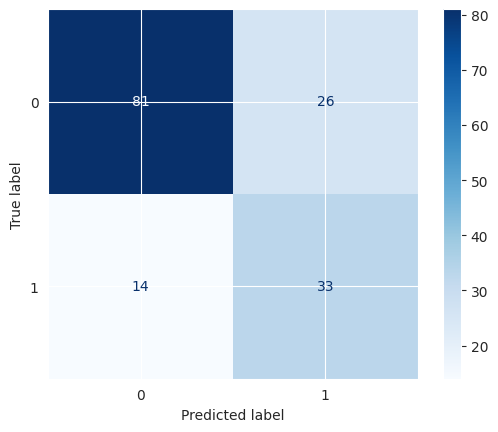

In [146]:
dist.plot(cmap="Blues")
plt.show()

In [148]:
print("auc logistica",roc_auc_score(y_test,predbalg_log_predictt))

auc logistica 0.8484788228275999
